# What Is a T-Test?

- A t-test is an inferential statistic used to determine if there is a statistically significant difference between the means of two variables.
- The t-test is a test used for hypothesis testing in statistics.
- Calculating a t-test requires three fundamental data values including the difference between the mean values from each data set, the standard deviation of each group, and the number of data values.
- T-tests can be dependent or independent.

https://www.wallstreetmojo.com/t-test/#t-test-explained

## 5 types of T-Test

#### 1. One-Sample T-Test : One-sample is used to determine whether an unknown population mean is different from a specific value.
Ex: Null hypothesis : The average height of Vietnamese men is 1m70. Alternative hypothesis(H1): The average height of Vietnamese men is 1m75

#### 2. Independent Two-Sample T-Test : An independent Two-Sample test is conducted when samples from two different groups, species, or populations are studied and compared.
Ex: One way to measure a person’s fitness is to measure their body fat percentage. Average body fat percentages vary by age, but according to some guidelines, the normal range for men is 15-20% body fat, and the normal range for women is 20-25% body fat.

#### 3. Paired Sample T-Test: Paired Sample is the hypothesis testing conducted when two groups belong to the same population or group.
A paired samples t-test is commonly used in two scenarios:
- A measurement is taken on a subject before and after some treatment – e.g. the max vertical jump of college basketball players is measured before and after participating in a training program.
- A measurement is taken under two different conditions – e.g. the response time of a patient is measured on two different drugs.

#### 4. Equal Variance T-Test : Equal Variance is conducted when the sample size in each group or population is the same, or the variance of the two data sets is similar.
Two-sample T-Test with equal variance can be applied when 
- the samples are normally distributed, 
- the standard deviation of both populations are unknown and assumed to be equal, and 
- the sample is sufficiently large (over 30).

Ex : To compare the height of two male populations from the United States and Sweden, a sample of 30 males from each country is randomly selected and the measured heights are provided.

#### 5. Unequal Variance T-Test : Unequal Variance is used when the variance and the number of samples in each group are different.
Two-sample T-Test with unequal variance can be applied when 
- the samples are normally distributed, 
- the standard deviation of both populations are unknown and assume to be unequal, 
- sample is sufficiently large (over 30). 

Ex : To compare the height of two male populations from the United States and Sweden, a sample of 30 males from each country is randomly selected and the measured heights are provided.

# What Is a p-value?

Xem Goodnote 

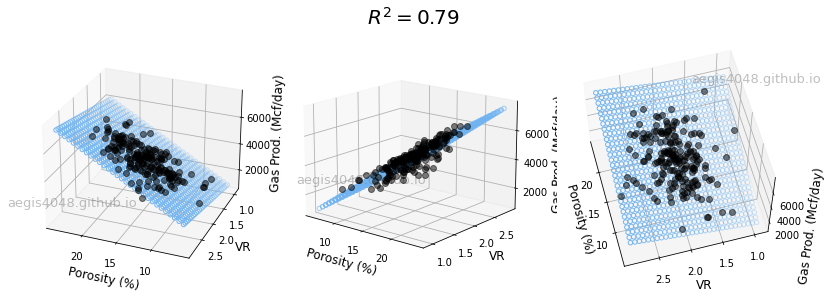

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

######################################## Data preparation #########################################

file = 'https://aegis4048.github.io/downloads/notebooks/sample_data/unconv_MV_v5.csv'
df = pd.read_csv(file)

X = df[['Por', 'VR']].values.reshape(-1,2)
Y = df['Prod']

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)      # range of porosity values
y_pred = np.linspace(0.93, 2.9, 30)  # range of VR values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Porosity (%)', fontsize=12)
    ax.set_ylabel('VR', fontsize=12)
    ax.set_zlabel('Gas Prod. (Mcf/day)', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=27, azim=112)
ax2.view_init(elev=16, azim=-51)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

# Pearson Correlation Coefficient

Measure the linear association between two numerical variables(if one go up, another should go up, if one go down, another should go down). Apply in PCA

# Kendall Correlation Coefficient(Kendall's Tau)

One less commonly used than Pearson Correlation is Kendall’s Tau, which measures the relationship between two columns of ranked data.

https://www.statology.org/kendalls-tau/

# Chi-Square Test

A Chi-Square goodness of fit test is used to determine whether or not a categorical variable follows a hypothesized distribution.

https://www.statology.org/chi-square-test-by-hand/

# Correlation Matrix 

A correlation matrix is simply a table which displays the correlation coefficients for different variables. The matrix depicts the correlation between all the possible pairs of values in a table. It is a powerful tool to summarize a large dataset and to identify and visualize patterns in the given data.M

There are three broad reasons for computing a correlation matrix:

- To summarize a large amount of data where the goal is to see patterns. In our example above, the observable pattern is that all the variables highly correlate with each other.
- To input into other analyses. For example, people commonly use correlation matrixes as inputs for exploratory factor analysis, confirmatory factor analysis, structural equation models, and linear regression when excluding missing values pairwise.
- As a diagnostic when checking other analyses. Correlation matrix can prevent mis-interpretations and errors linked to correlated variables input in the models. For example, with linear regression, a high amount of correlations suggests that the linear regression estimates will be unreliable. 

https://www.displayr.com/what-is-a-correlation-matrix/

# 4 Categorical Encoding Concepts to Know for Data Scientists

- One hot encoding
- Label encoding
- Hash encoding 
- Target encoding
- Leave One Out Encoding (LOOE) (Same as target encoding but add Gaussian noise distribution to decrease overfitting.)

https://medium.com/analytics-vidhya/target-encoding-vs-one-hot-encoding-with-simple-examples-276a7e7b3e64

https://towardsdatascience.com/4-categorical-encoding-concepts-to-know-for-data-scientists-e144851c6383

# None linear relationship

- Quadratic Relationships
- Cubic Relationships
- Exponential Relationships
- Logarithmic Relationships
- Cosine relationships

https://www.statology.org/nonlinear-relationship-examples/

# Machine learning model interpretation

Motivation:

There are some models  like linear models, logistic regression and tree-bases can be easily interpreted because of their intuitive way of getting to the predictions. On the other hand, you have more complex models like ensemble models (e.g., Random Forest, XGBoost, etc.) and deep neural networks, which are especially hard to interpret because of their complexity.  For real-world problems like fraud detection, self-driving cars, or loan lending, the model doesn't only need to perform well but also needs to be easily interpretable so we can see why a loan was/wasn't approved and use our domain expertise to validate or correct the decision. => we need to find an approach to interpret model, that's how Model Interpretability is come up with.



Part 1: Machine Learning Model Interpretability (this article) : https://gilberttanner.com/blog/introduction-to-machine-learning-model-interpretation/

Key take away:
What features are important ?
- Feature importance : While feature importance shows us what features are important, it doesn't give us information on the effect of a particular change in the feature. A partial dependence plot can show whether the relationship between the target and a feature is linear, exponential or more complex.
- Partial Dependence Plots (PDP): While feature importance shows us what features are important, it doesn't give us information on the effect of a particular change in the feature. A partial dependence plot can show whether the relationship between the target and a feature is linear, exponential or more complex.

Understand individual predictions
Why did the model make this specific prediction? This question becomes increasingly more important as machine learning models are increasingly used in applications like fraud detection or medical tasks because for these kinds of applications, it is imperative to validate and justify the results produced by a model.
- LIME (LOCAL INTERPRETABLE MODEL-AGNOSTIC EXPLANATIONS) : In the paper "Why Should I Trust You?" the authors propose a method called Local interpretable model-agnostic explanations (LIME), where surrogate models are trained to approximate the predictions of the underlying black box model locally instead of globally.

It achieves this by creating a new dataset from permuted data points around a data point of interest and the corresponding predictions of the black-box model. LIME then uses this new dataset to train an interpretable model like a tree or linear model, which then can be used to explain the black box model at this local point.
- Shapley Values: In the case of machine learning, the "game" is the prediction task for a data point. The "gain" is the prediction minus the average prediction of all instances, and the "players" are the feature values of the data point.

Part 2: What features are important : https://gilberttanner.com/blog/hands-on-global-model-interpretation/
- ELI5 library. ELI5 allows users to visualize and debug various Machine Learning  Models. It also offers more than just feature importance, including library-specific features and a text-explainer.
- Partial Dependence Plots: For creating partial dependence plots, we will use the PDPbox library. PDPbox provides us with a few different well-designed plots, including partial dependence plots for a single feature and partial dependence plots for multiple features.

Part 3: https://gilberttanner.com/blog/local-model-interpretation-an-introduction/

How to implement LIME and Shapey Values

In general, Lime is very good for getting a quick look at what the model is doing but has problems with consistency. On the other hand, Shapley value delivers a full explanation, making it a lot more exact than Lime.


# Forcasting algorithm

Arima

https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/#:~:text=time%20series%20forecasts.-,ARIMA%20is%20an%20acronym%20that%20stands%20for%20AutoRegressive%20Integrated%20Moving,aspects%20of%20the%20model%20itself.